In [87]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/IS450/IS450TextMiningG2T2/data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/IS450/IS450TextMiningG2T2/data


### Extract categories from the folder directory

In [ ]:
# code to extract filenames from the folders to obtain the respective categories 

import os
from pydoc import doc

import pandas as pd 

path = "/Users/apple/Desktop/Code Repo/IS450/CUAD_v1/full_contract_pdf"

file_dict = {}

arr = os.listdir(path)
for i in arr:
    if i != ".DS_Store":
        print(i)
        arr2 = os.listdir(f'{path}/{i}')
        for j in arr2:
            print(j)
            if j != ".DS_Store":
                arr3 = os.listdir(f'{path}/{i}/{j}')
                if j not in file_dict:
                    file_dict[j] = arr3
                else:
                    file_dict[j] += arr3


category1 = []
doc_name = []

for k,v in file_dict.items():
    for i in v:
        category1.append(k)
        doc_name.append(i)

data = pd.DataFrame()
data['doc_name'] = doc_name
data['category'] = category1
data

data.to_csv("file_name_categories.csv")

### Generate word cloud

In [88]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('stopwords')
import string
import re
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS

In [127]:
data_content = pd.read_excel("contract_new_with_category.xlsx").sort_values("contract")
data_category = pd.read_csv("file_name_categories.csv").drop(['Unnamed: 0'],axis=1).sort_values("doc_name").reset_index()

In [124]:
data_content.head()

,contract,content,agreement
0,2ThemartComInc_19990826_10-12G_EX-10.10_670028...,CO-BRANDING AND ADVERTISING AGREEMENT THIS CO-...,['CO-BRANDING AND ADVERTISING AGREEMENT']
1,ABILITYINC_06_15_2020-EX-4.25-SERVICESAGREEMEN...,EXHIBIT 4.25 INFORMATION IN THIS EXHIBIT IDENT...,['Services Agreement']
2,ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...,EXHIBIT 10.13 JOINT VENTURE AGREEMENT Collecti...,['JOINT VENTURE AGREEMENT']
3,ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTORAGRE...,Exhibit 10.31 PURSUANT TO 17 C.F.R. § 240.24B-...,['Multiple LINAC and Multi-Modality Distributo...
4,ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENTAG...,REDACTED COPY CONFIDENTIAL TREATMENT REQUESTED...,['ENDORSEMENT AGREEMENT']


In [128]:
data_category.head()

,index,doc_name,category
0,467,2ThemartComInc_19990826_10-12G_EX-10.10_670028...,Co_Branding
1,314,ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...,Service
2,441,ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...,Joint Venture
3,200,ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...,Distributor
4,409,ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...,Endorsement Agreement


In [129]:
master_df = data_content[['contract','content']]
master_df['category'] = data_category['category']
master_df['doc_name'] = data_category['doc_name']

In [145]:
master_df['category'].replace("Affiliate_Agreements", "Affiliate Agreement",inplace=True)
master_df['category'].replace("Joint Venture _ Filing", "Joint Venture",inplace=True)
master_df['category'].replace("Endorsement Agreement", "Endorsement",inplace=True)

master_df

,contract,content,category,doc_name
0,2ThemartComInc_19990826_10-12G_EX-10.10_670028...,CO-BRANDING AND ADVERTISING AGREEMENT THIS CO-...,Co_Branding,2ThemartComInc_19990826_10-12G_EX-10.10_670028...
1,ABILITYINC_06_15_2020-EX-4.25-SERVICESAGREEMEN...,EXHIBIT 4.25 INFORMATION IN THIS EXHIBIT IDENT...,Service,ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...
2,ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...,EXHIBIT 10.13 JOINT VENTURE AGREEMENT Collecti...,Joint Venture,ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...
3,ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTORAGRE...,Exhibit 10.31 PURSUANT TO 17 C.F.R. § 240.24B-...,Distributor,ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...
4,ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENTAG...,REDACTED COPY CONFIDENTIAL TREATMENT REQUESTED...,Endorsement,ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...
...,...,...,...,...
505,ZEBRATECHNOLOGIESCORP_04_16_2014-EX-10.1-INTEL...,Exhibit 10.1 INTELLECTUAL PROPERTY AGREEMENT T...,IP,ZEBRATECHNOLOGIESCORP_04_16_2014-EX-10.1-INTEL...
506,ZONDWINDSYSTEMPARTNERSLTDSERIES85-B_04_03_2006...,Exhibit 10.17(b) ---------------- FIRST AMENDM...,Maintenance,ZONDWINDSYSTEMPARTNERSLTDSERIES85-B_04_03_2006...
507,ZogenixInc_20190509_10-Q_EX-10.2_11663313_EX-1...,Exhibit 10.2 CERTAIN INFORMATION (INDICATED BY...,Distributor,ZogenixInc_20190509_10-Q_EX-10.2_11663313_EX-1...
508,"ZoundsHearing,Inc.-MANUFACTURINGDESIGNMARKETIN...","Exhibit 10.1 MANUFACTURING, DESIGN AND MARKETI...",Marketing,"Zounds Hearing, Inc. - MANUFACTURING DESIGN MA..."


In [146]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   contract  510 non-null    object
 1   content   510 non-null    object
 2   category  510 non-null    object
 3   doc_name  510 non-null    object
dtypes: object(4)
memory usage: 19.9+ KB


In [147]:
master_df['category'].value_counts()

Maintenance                34
License_Agreements         33
Distributor                32
Strategic Alliance         32
Sponsorship                31
Development                29
Service                    28
Collaboration              26
Endorsement                24
Joint Venture              23
Co_Branding                22
Hosting                    20
Outsourcing                18
Supply                     18
IP                         17
Manufacturing              17
Marketing                  17
Franchise                  15
Transportation             13
Agency Agreements          13
Promotion                  12
Reseller                   12
Consulting Agreements      11
Affiliate Agreement        10
Non_Compete_Non_Solicit     3
Name: category, dtype: int64

In [157]:
category = master_df['category'].value_counts().index.tolist()
category

['Maintenance',
 'License_Agreements',
 'Distributor',
 'Strategic Alliance',
 'Sponsorship',
 'Development',
 'Service',
 'Collaboration',
 'Endorsement',
 'Joint Venture',
 'Co_Branding',
 'Hosting',
 'Outsourcing',
 'Supply',
 'IP',
 'Manufacturing',
 'Marketing',
 'Franchise',
 'Transportation',
 'Agency Agreements',
 'Promotion',
 'Reseller',
 'Consulting Agreements',
 'Affiliate Agreement',
 'Non_Compete_Non_Solicit']

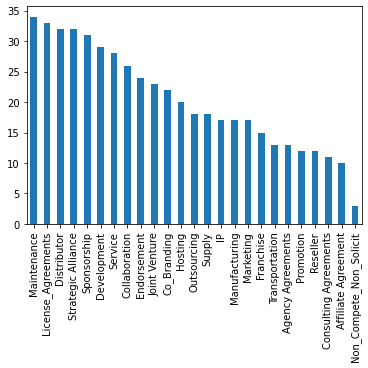

In [151]:
master_df['category'].value_counts().plot.bar()

In [178]:
def clean_text(text):
    # Lowercase, Remove Non-alphanumeric characters, Punctuations, Numbers & Stopwords
    text = text.lower()
    text = re.sub('[^A-Za-z\s]+', '', text)
    text = re.sub('\w*\d\w*', '', text) 

    # text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    stop = stopwords.words('english')
    text = ' '.join([word for word in text.split() if word not in (stop)])

    return text



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [179]:
master_df['content_cleaned'] = master_df['content'].apply(clean_text)

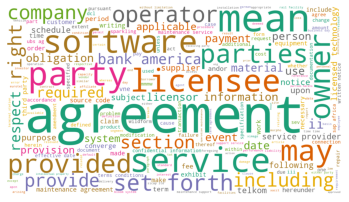

Saved Maintenance wordcloud


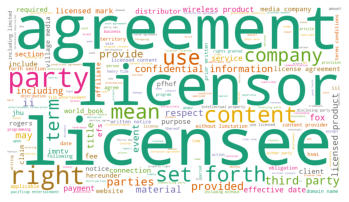

Saved License_Agreements wordcloud


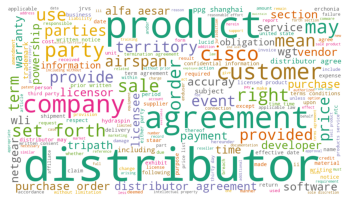

Saved Distributor wordcloud


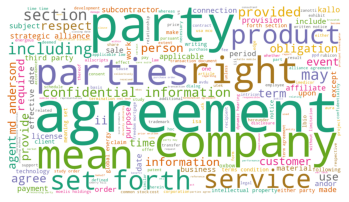

Saved Strategic Alliance wordcloud


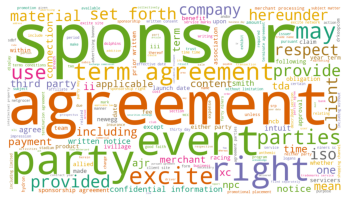

Saved Sponsorship wordcloud


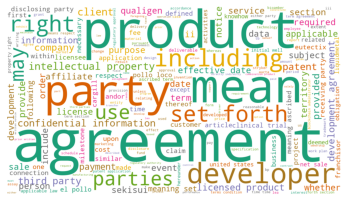

Saved Development wordcloud


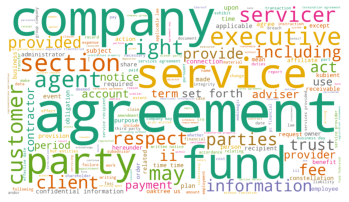

Saved Service wordcloud


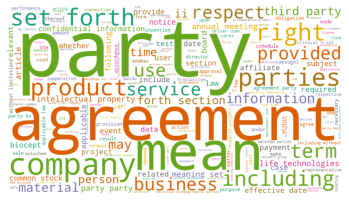

Saved Collaboration wordcloud


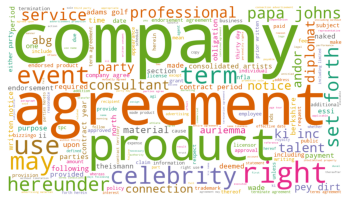

Saved Endorsement wordcloud


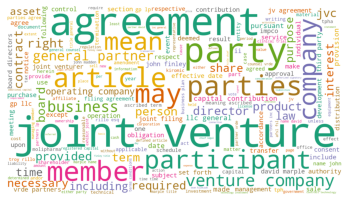

Saved Joint Venture wordcloud


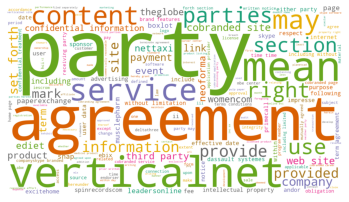

Saved Co_Branding wordcloud


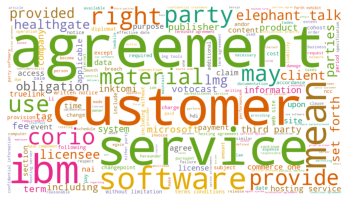

Saved Hosting wordcloud


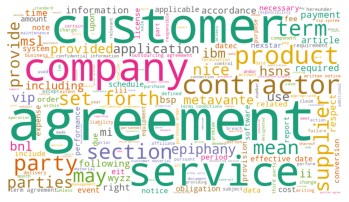

Saved Outsourcing wordcloud


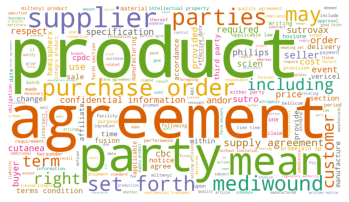

Saved Supply wordcloud


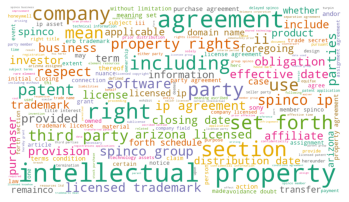

Saved IP wordcloud


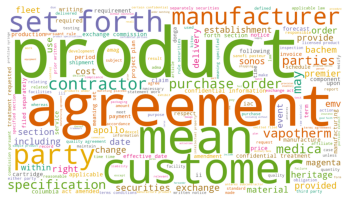

Saved Manufacturing wordcloud


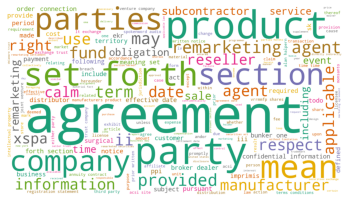

Saved Marketing wordcloud


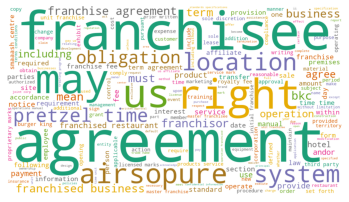

Saved Franchise wordcloud


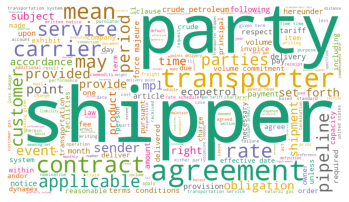

Saved Transportation wordcloud


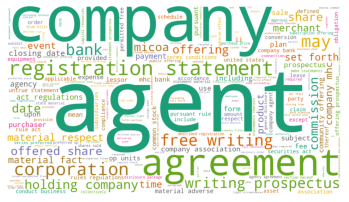

Saved Agency Agreements wordcloud


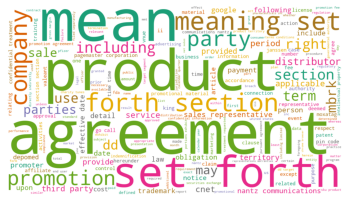

Saved Promotion wordcloud


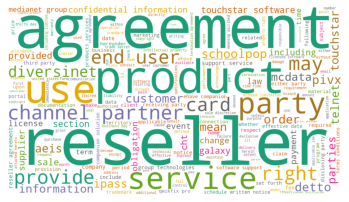

Saved Reseller wordcloud


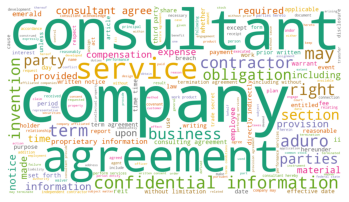

Saved Consulting Agreements wordcloud


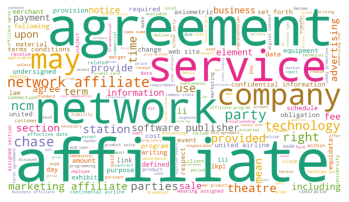

Saved Affiliate Agreement wordcloud


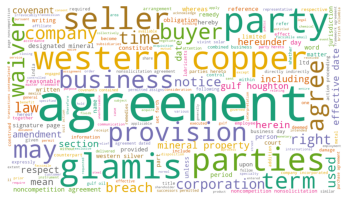

Saved Non_Compete_Non_Solicit wordcloud


In [190]:


output = "/content/drive/MyDrive/IS450/IS450TextMiningG2T2/EDA/word cloud"

master_df_groupby = master_df.groupby('category')

for i in category:
  master_df_category = master_df_groupby.get_group(i)
  # content_category = master_df_category['content_cleaned'].tolist()

  # wordcloud 
  text = ' '.join(master_df_category['content_cleaned'])
  wordcloud = WordCloud(width=1280, height=720,
               background_color="white", colormap="Dark2",
               random_state=42).generate(text)

  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()
  wordcloud.to_file(f"{output}/{i}.png")
  print(f"Saved {i} wordcloud")

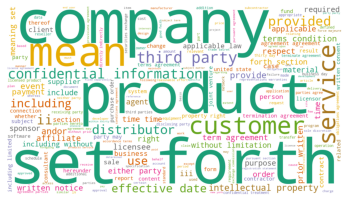

Saved corpus wordcloud


In [191]:
text = ' '.join(master_df['content_cleaned'])
wordcloud = WordCloud(width=1280, height=720,
          background_color="white", colormap="Dark2",
          random_state=42).generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file(f"{output}/corpus wc.png")
print(f"Saved corpus wordcloud")